# Number of opinion changes
### At varying sentiment levels

Analysis of statistics of opinions, here: total number of opinion changes/updates. How does this number change when sentiment bounds are varied, and the interaction with parameters $\gamma$, $\theta$, $\kappa$. $\lambda$ is 0.5 (minimum variance treatment) in all the simulations that were considered here.

The figure portraying the effect of $\theta$, conditioned on $\alpha$, appears in the paper as the bottom right panel of Figure 5.

In [1]:
%matplotlib notebook

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('text', usetex=True)

Path

In [2]:
parent_path = os.path.join(os.getcwd(), "figures")

path = os.path.join(os.getcwd(), "figures\\opinion_changes")

if not os.path.exists(parent_path):
    os.mkdir(parent_path)
if not os.path.exists(path):
    os.mkdir(path)

In [3]:
sns.set_style('whitegrid')

l = '$\lambda$'
th = '$\\theta$'
g = '$\gamma$'
k = '$\kappa$'

### Data

Import (read) and organise data

In [4]:
# empty 4-dimensional array (one for each parameter)
opc = np.full((21,9,9,9), np.nan)

##### Dimensions - Parameters:
* **0: sentiment value** $\rightarrow \texttt{range(0.05, 0.95, 0.05)}$
* **1: theta** $\rightarrow \texttt{range(0.1, 0.9, 0.1)}$
* **2: gamma** $\rightarrow \texttt{range(0.1, 0.9, 0.1)}$
* **3: kappa** $\rightarrow \texttt{range(0.1, 0.9, 0.1)}$

In [5]:
# sentiment values
sents = ['00', '05'] + [str(i) for i in range(10, 101, 5)]

# loop through sentiment values, read data and store in appropriate position
for i, sent in enumerate(sents):
    with open(f'M2/K1G1T1-A300T1000M50S{sent}-n8/stats.txt') as f:
        for j, line in enumerate(f):
            opc[i][j%9][(j//9)%9][j//81] = float(line.split('\t')[4])

### Analysis of unconditional values

#### Sentiment

Number of opinion changes at different sentiment levels, averaged over all other parameters

In [6]:
n = opc[i,:,:,:].flatten().shape[0]
opc_sent = np.array([opc[i,:,:,:].mean() for i in range(21)])
opc_snt_er = np.array([np.std(opc[i,:,:,:].flatten()) / np.sqrt(n) for i in range(21)])

<IPython.core.display.Javascript object>


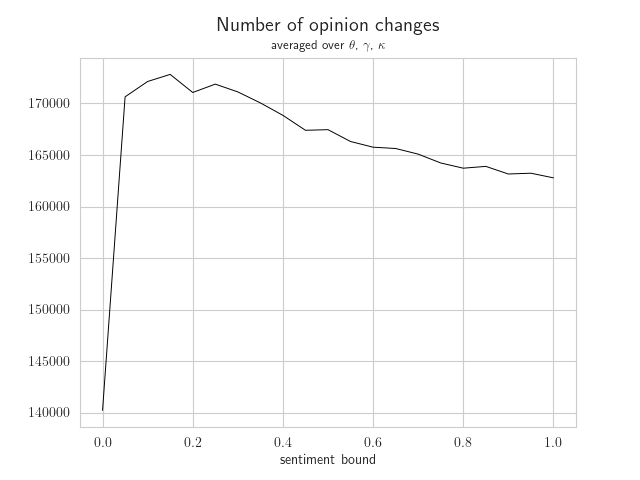

In [7]:
x = [int(sent) / 100 for sent in sents]
plt.figure()
plt.title('\Large{Number of opinion changes} \n \small{averaged over $\\theta$, $\gamma$, $\kappa$}')
plt.xlabel('sentiment bound')
plt.text(0.65, 0.164, '$\lambda=0.5$')
plt.plot(x, opc_sent, linewidth=0.7, c='black')

plt.savefig('figures/opinion_changes/sentiment_opc.png')

<IPython.core.display.Javascript object>


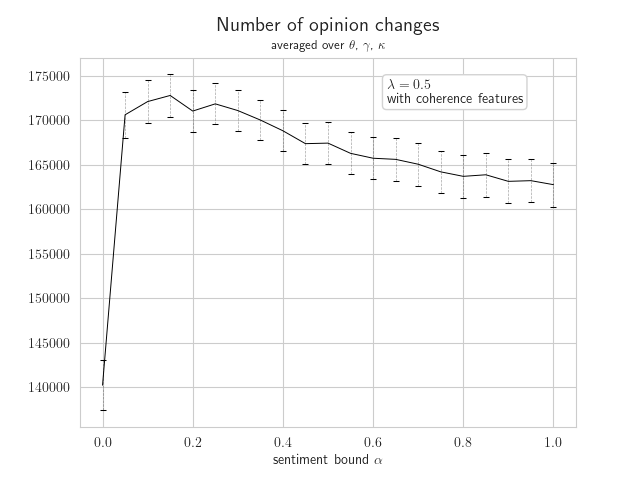

In [8]:
x = [int(sent) / 100 for sent in sents]
plt.figure()
plt.title('\Large{Number of opinion changes} \n \small{averaged over $\\theta$, $\gamma$, $\kappa$}')
plt.xlabel('sentiment bound $\\alpha$')

eb = plt.errorbar(x, opc_sent, opc_snt_er, linewidth=0.7, c='black', elinewidth=0.5, capsize=2, capthick=0.75)
eb[-1][0].set_linestyle('--')
eb[-1][0].set_alpha(0.35)

props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.63, 172000, '$\lambda=0.5$ \n with coherence features', bbox=props)

plt.savefig('figures/opinion_changes/sentiment_opc_erbar.png')

### Analysis of conditional values 

#### Sentiment | $\theta$

Variance of opinions at different sentiment bound levels, for all different values of theta

In [9]:
# colomap for different values of variables that sentiment is conditioned on
cmap = plt.cm.coolwarm(np.linspace(0.1, 0.9, 9))

In [10]:
opc_sent_t = np.array([[opc[i,j,:,:].mean() for i in range(21)]for j in range(9)])

<IPython.core.display.Javascript object>


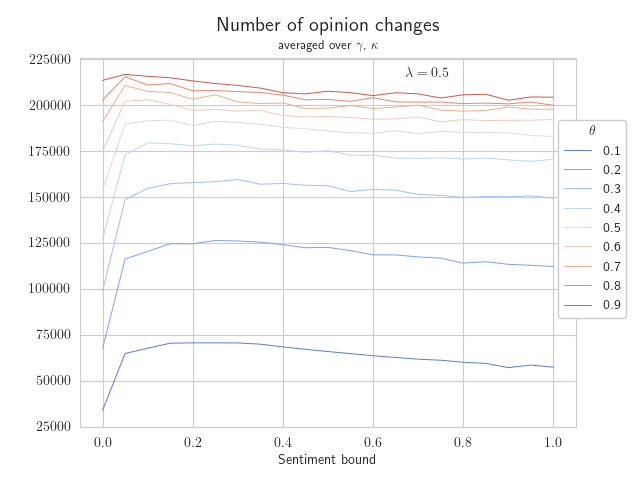

In [11]:
plt.figure()
plt.title('\Large{Number of opinion changes} \n \small{averaged over $\gamma$, $\kappa$}')

for i in range(9):
    plt.plot(x, opc_sent_t[i], label=(i+1)/10, lw=0.7, c=cmap[i])

plt.xlabel('Sentiment bound')

plt.legend(title='$\\theta$', bbox_to_anchor=(0.95, 0.85), framealpha=1)
plt.text(0.67, 215000, '$\lambda=0.5$')

plt.savefig('figures/opinion_changes/sentiment_theta_opc.png')

<IPython.core.display.Javascript object>


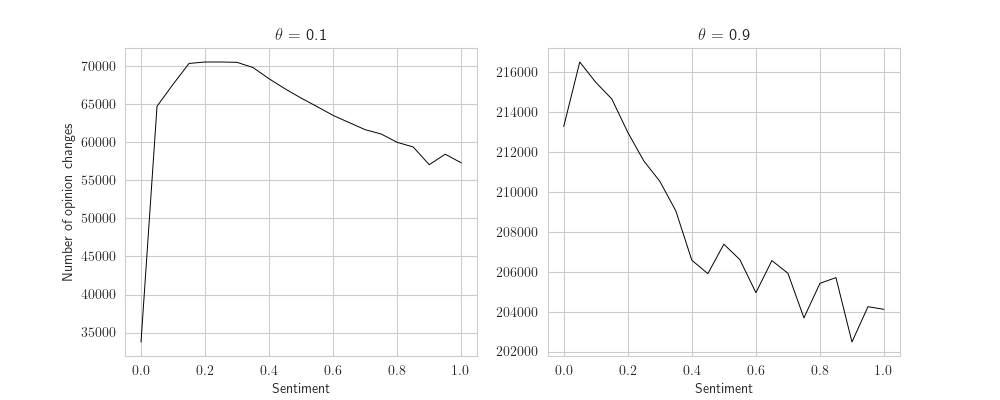

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax1.plot(x, opc_sent_t[0], c='black', lw=0.7)
ax1.set_title('$\\theta$ = 0.1')
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Number of opinion changes')

ax2.plot(x, opc_sent_t[-1], c='black', lw=0.7)
ax2.set_title('$\\theta$ = 0.9')
ax2.set_xlabel('Sentiment')

plt.savefig('figures/opinion_changes/sentiment_theta_low_and_high.png')

#### Sentiment | $\gamma$

In [13]:
opc_sent_g = np.array([[opc[i,:,j,:].mean() for i in range(21)]for j in range(9)])

<IPython.core.display.Javascript object>


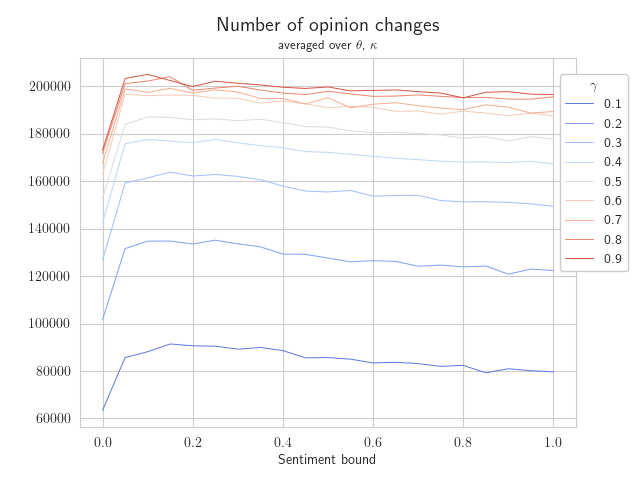

In [14]:
plt.figure()
plt.title('\Large{Number of opinion changes} \n \small{averaged over $\\theta$, $\kappa$}')

for i in range(9):
    plt.plot(x, opc_sent_g[i], label=(i+1)/10, lw=0.7, c=cmap[i])

plt.xlabel('Sentiment bound')

plt.legend(title='$\gamma$', bbox_to_anchor=(0.9535, 0.975), framealpha=1)
plt.text(0.825, 0.1415, '$\lambda=0.5$')

plt.savefig('figures/opinion_changes/sentiment_gamma_opc.png')

#### Sentiment | $\kappa$

In [15]:
opc_sent_k = np.array([[opc[i,:,:,j].mean() for i in range(21)]for j in range(9)])

<IPython.core.display.Javascript object>


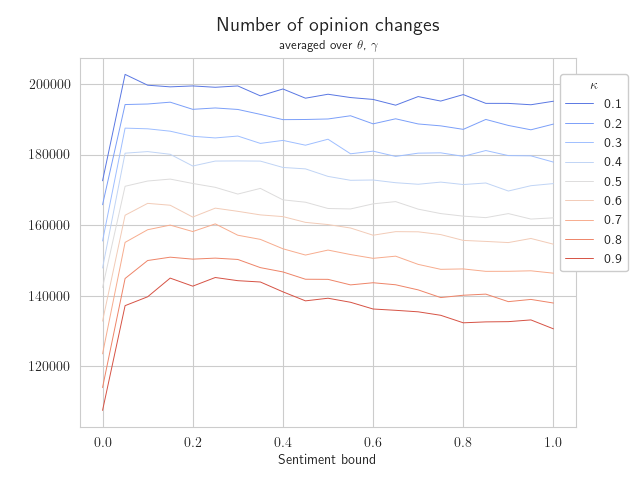

In [16]:
plt.figure()
plt.title('\Large{Number of opinion changes} \n \small{averaged over $\\theta$, $\gamma$}')

for i in range(9):
    plt.plot(x, opc_sent_k[i], label=(i+1)/10, lw=0.7, c=cmap[i])

plt.xlabel('Sentiment bound')

plt.legend(title='$\kappa$', bbox_to_anchor=(0.9535, 0.975), framealpha=1)
plt.text(0.825, 0.1415, '$\lambda=0.5$')

plt.savefig('figures/opinion_changes/sentiment_kappa_opc.png')

### Other parameters conditional on sentiment

#### $\theta$ | Sentiment

Other way around

In [17]:
# colormap for different values of variables that are conditioned on sentiment 
cmap = plt.cm.coolwarm(np.linspace(0, 1, 21))

In [18]:
opc_t_sent = np.array([[opc[i,j,:,:].mean() for j in range(9)]for i in range(21)])

<IPython.core.display.Javascript object>


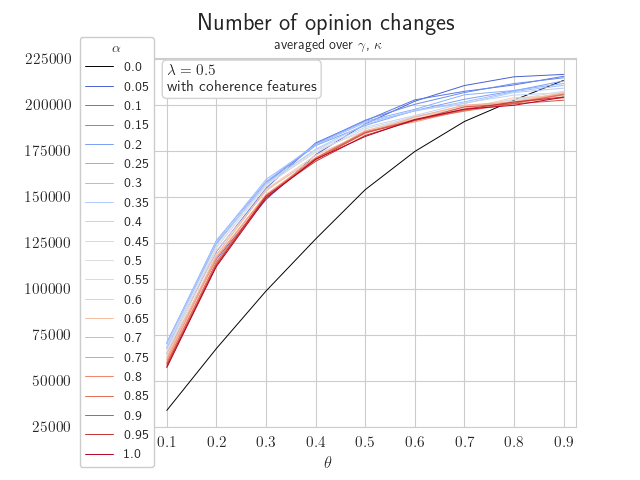

In [19]:
plt.figure()
plt.title('\LARGE{Number of opinion changes} \n \\normalsize{averaged over $\gamma$, $\kappa$}')

for i in range(21):
    if i == 0:
        plt.plot(np.linspace(0.1,0.9,9),opc_t_sent[i], label=i/20, lw=0.7, c='black')
    else:
        plt.plot(np.linspace(0.1,0.9,9),opc_t_sent[i], label=i/20, lw=0.7, c=cmap[i])

plt.xlabel('$\\theta$', fontsize=12)

ax = plt.gca()
ax.tick_params(axis='both', labelsize=11)

plt.xlim(-0.075, 0.925)
plt.xticks(np.linspace(0.1, 0.9, 9))

plt.legend(title='$\\alpha$', loc='upper left', bbox_to_anchor=(-0.015, 1.075), framealpha=1, fontsize=10)
props = dict(boxstyle='round', facecolor='white', edgecolor='lightgrey', alpha=1)
plt.text(0.175, 0.91, '$\lambda=0.5$ \n with coherence features', bbox=props, transform=ax.transAxes, fontsize=11)

plt.savefig('figures/opinion_changes/theta_sentiment_opc.png')
plt.savefig('figures/opinion_changes/theta_sentiment_opc_cred.eps')

#### $\gamma$ | Sentiment

In [20]:
opc_g_sent = np.array([[opc[i,:,j,:].mean() for j in range(9)]for i in range(21)])

<IPython.core.display.Javascript object>


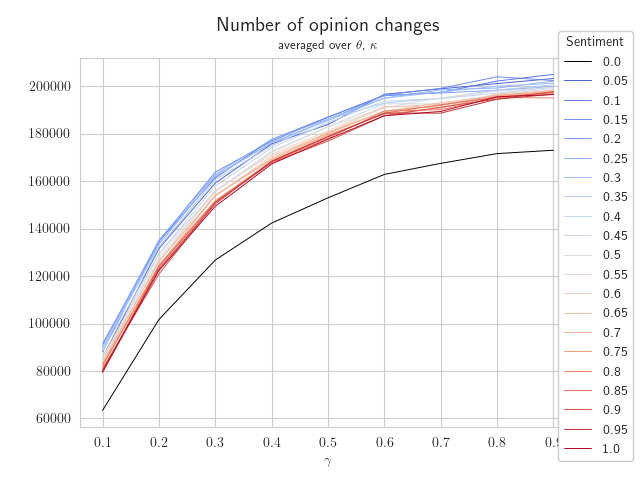

In [21]:
plt.figure()
plt.title('\Large{Number of opinion changes} \n \small{averaged over $\\theta$, $\kappa$}')

for i in range(21):
    if i == 0:
        plt.plot(np.linspace(0.1,0.9,9), opc_g_sent[i], label=i/20, lw=0.7, c='black')
    else:
        plt.plot(np.linspace(0.1,0.9,9), opc_g_sent[i], label=i/20, lw=0.7, c=cmap[i])

plt.xlabel('$\gamma$')

plt.legend(title='Sentiment', bbox_to_anchor=(0.95, 1.09), framealpha=1)
plt.text(0.805, 0.1815, '$\lambda=0.5$')

plt.savefig('figures/opinion_changes/gamma_sentiment_opc.png')

#### $\kappa$ | Sentiment

In [22]:
opc_k_sent = np.array([[opc[i,:,:,j].mean() for j in range(9)]for i in range(21)])

<IPython.core.display.Javascript object>


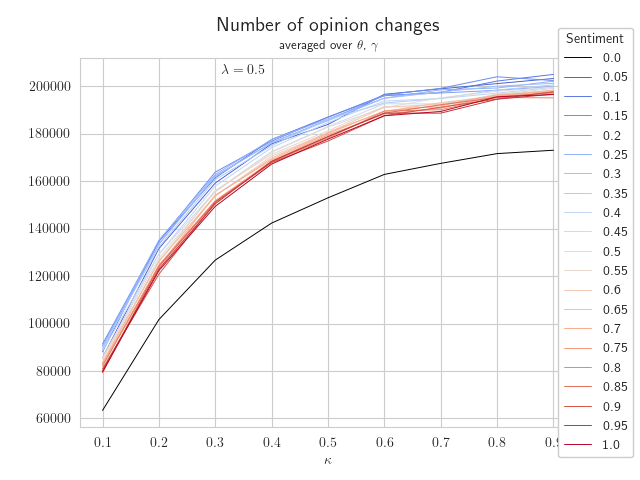

In [23]:
plt.figure()
plt.title('\Large{Number of opinion changes} \n \small{averaged over $\\theta$, $\gamma$}')

for i in range(21):
    if i == 0:
        plt.plot(np.linspace(0.1,0.9,9), opc_g_sent[i], label=i/20, lw=0.7, c='black')
    else:
        plt.plot(np.linspace(0.1,0.9,9), opc_g_sent[i], label=i/20, lw=0.7, c=cmap[i])

plt.xlabel('$\kappa$')

plt.legend(title='Sentiment', bbox_to_anchor=(0.95, 1.1), framealpha=1)
plt.text(0.31, 205000, '$\lambda=0.5$')

plt.savefig('figures/opinion_changes/kappa_sentiment_opc.png')